In [19]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy as sp
import seaborn as sns
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.datasets import fetch_california_housing, fetch_openml, load_boston, load_diabetes
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,cross_val_score
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,LabelBinarizer,LabelEncoder
set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', 122)
pd.set_option('display.max_colwidth', 122)
import warnings
warnings.filterwarnings('ignore')

In [15]:
data=pd.read_csv("application_train.csv")

In [46]:
df=data.copy()

### infomation sur les données manquantes du type numériques

In [33]:
for col in df.select_dtypes(include="number"):
    print(f'{col:-<50} {df[col].isna().sum()}') 


SK_ID_CURR---------------------------------------- 0
TARGET-------------------------------------------- 0
CNT_CHILDREN-------------------------------------- 0
AMT_INCOME_TOTAL---------------------------------- 0
AMT_CREDIT---------------------------------------- 0
AMT_ANNUITY--------------------------------------- 12
AMT_GOODS_PRICE----------------------------------- 278
REGION_POPULATION_RELATIVE------------------------ 0
DAYS_BIRTH---------------------------------------- 0
DAYS_EMPLOYED------------------------------------- 0
DAYS_REGISTRATION--------------------------------- 0
DAYS_ID_PUBLISH----------------------------------- 0
OWN_CAR_AGE--------------------------------------- 202929
FLAG_MOBIL---------------------------------------- 0
FLAG_EMP_PHONE------------------------------------ 0
FLAG_WORK_PHONE----------------------------------- 0
FLAG_CONT_MOBILE---------------------------------- 0
FLAG_PHONE---------------------------------------- 0
FLAG_EMAIL----------------------------

### infomation sur les données manquantes du type objects

In [34]:
for col in df.select_dtypes(include="object"):
    print(f'{col:-<50} {df[col].isna().sum()}') 

NAME_CONTRACT_TYPE-------------------------------- 0
CODE_GENDER--------------------------------------- 0
FLAG_OWN_CAR-------------------------------------- 0
FLAG_OWN_REALTY----------------------------------- 0
NAME_TYPE_SUITE----------------------------------- 1292
NAME_INCOME_TYPE---------------------------------- 0
NAME_EDUCATION_TYPE------------------------------- 0
NAME_FAMILY_STATUS-------------------------------- 0
NAME_HOUSING_TYPE--------------------------------- 0
OCCUPATION_TYPE----------------------------------- 96391
WEEKDAY_APPR_PROCESS_START------------------------ 0
ORGANIZATION_TYPE--------------------------------- 0
FONDKAPREMONT_MODE-------------------------------- 210295
HOUSETYPE_MODE------------------------------------ 154297
WALLSMATERIAL_MODE-------------------------------- 156341
EMERGENCYSTATE_MODE------------------------------- 145755


#### imputation des données manquantes par les observtions les plus fréquentes

In [47]:
inputer=SimpleImputer( missing_values=np.nan,strategy="most_frequent")

In [48]:
df=pd.DataFrame(inputer.fit_transform(df),columns=df.columns,index=df.index)

In [49]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,7.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,7.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.7463,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.356323,0.555912,0.729567,0.0825,0.0,0.9871,0.8232,0.0,0.0,0.1379,0.1667,0.2083,0.0,0.0504,0.0,0.0,0.0,0.084,0.0,0.9871,0.8301,0.0,0.0,0.1379,0.1667,0.2083,0.0,0.0551,0

In [54]:
for col in df.select_dtypes(include="number"):
     print(f'{col:-<50} {df[col].isna().sum()}')

In [52]:
for col in df.select_dtypes(include="object"):
    print(f'{col:-<50} {df[col].isna().sum()}') 

SK_ID_CURR---------------------------------------- 0
TARGET-------------------------------------------- 0
NAME_CONTRACT_TYPE-------------------------------- 0
CODE_GENDER--------------------------------------- 0
FLAG_OWN_CAR-------------------------------------- 0
FLAG_OWN_REALTY----------------------------------- 0
CNT_CHILDREN-------------------------------------- 0
AMT_INCOME_TOTAL---------------------------------- 0
AMT_CREDIT---------------------------------------- 0
AMT_ANNUITY--------------------------------------- 0
AMT_GOODS_PRICE----------------------------------- 0
NAME_TYPE_SUITE----------------------------------- 0
NAME_INCOME_TYPE---------------------------------- 0
NAME_EDUCATION_TYPE------------------------------- 0
NAME_FAMILY_STATUS-------------------------------- 0
NAME_HOUSING_TYPE--------------------------------- 0
REGION_POPULATION_RELATIVE------------------------ 0
DAYS_BIRTH---------------------------------------- 0
DAYS_EMPLOYED---------------------------------

### encodage des variables catégorielles

In [55]:
encoder = LabelEncoder()
for col in df.describe(include='object').columns:
    df[col]=encoder.fit_transform(df[col])
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,1,0,1754,1191,4588,189,6,7,4,3,1,63,15684,11935,12039,4047,7,1,1,0,1,1,0,8,0,1,1,6,10,0,0,0,0,0,0,5,1293,28075,287,144,369,228,92,143,0,46,38,36,369,99,190,0,0,24,383,164,97,144,0,2,2,3,377,24,198,0,0,47,369,188,94,144,0,4,4,6,375,47,193,0,0,2,0,149,5,0,2,2,2,2,2638,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,2064,4338,6985,704,1,4,1,1,1,11,8382,11384,14501,5876,7,1,1,0,1,1,0,3,1,0,0,1,11,0,0,0,0,0,0,39,26640,85081,689,670,529,254,118,605,72,7,191,148,130,481,549,35,98,88,538,190,123,497,2,1,7,8,128,86,554,0,0,185,529,214,120,608,4,2,14,16,132,183,558,2,100,2,0,714,0,0,1,0,1,0,2944,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,1,1,1,0,338,228,662,30,6,7,4,3,1,47,6101,12347,11427,3636,26,1,1,1,1,1,0,8,0,1,1,1,9,0,0,0,0,0,0,11,33694,72833,677,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,2957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,1170,836,5680,145,6,7,4,0,1,34,6142,9533,5854,3730,7,1,1,0,1,0,0,8,1,1,1,6,17,0,0,0,0,0,0,5,33694,90561,689,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,2,0,2,0,3155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,1,0,1,0,1019,1635,3960,352,6,7,4,3,1,74,5215,9534,11376,2709,7,1,1,0,1,0,0,3,0,1,1,4,11,0,0,0,0,1,1,37,33694,36023,689,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,2666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### division du dataset

In [92]:
x=df.drop("TARGET",axis=1)
y=df["TARGET"]

### la proportion des targets

In [93]:
y.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

### train_set ,test_set 

In [97]:
import random
seed=0
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=seed,stratify=y)
print(x_train.shape)
print(x_test.shape)

(246008, 121)
(61503, 121)


### verification du proportion dans les differentes bases 

In [95]:
print( "dans la base application \n", y.value_counts(normalize=True))
print("*****************************************************************************************")
print( "dans la base train set  application \n",y_train.value_counts(normalize=True))
print("*****************************************************************************************")
print("dans la base test set  application \n",y_train.value_counts(normalize=True))

dans la base application 
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64
*****************************************************************************************
dans la base train set  application 
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64
*****************************************************************************************
dans la base test set  application 
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [67]:
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

In [68]:
print("dans la base test set  application \n",y_val.value_counts(normalize=True))

dans la base test set  application 
 0    0.919287
1    0.080713
Name: TARGET, dtype: float64


### le ré-échantillonnage ( le sur-échantillonnage) 

In [98]:
from sklearn.utils import resample

## creation des categories 
x1=x_train
x1["TARGET"]=y_train.values
## la classe minoritaire
mino=x1[x1["TARGET"]==1]
print(mino.shape)
majo=x1[x1["TARGET"]==0]
print(majo.shape)
mino_rechant= resample(mino,replace=True,n_samples=majo.shape[0])
mino_rechant

(19860, 122)
(226148, 122)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
142315,142315,0,0,0,1,0,904,247,1227,22,6,7,4,1,1,15,14790,11347,11491,3722,7,1,1,0,1,0,0,14,1,1,1,0,9,0,0,0,0,0,0,42,22284,60907,689,1028,3101,257,122,0,175,201,166,9,0,1084,2487,0,0,65,3185,192,127,0,6,5,4,1,0,216,2591,0,0,280,3097,217,124,0,12,11,12,2,0,430,2532,0,0,3,0,1957,5,0,0,0,0,0,3514,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
122263,122263,0,1,0,0,0,1989,2260,3696,469,6,1,1,1,1,74,3179,11336,9014,1463,7,1,1,0,1,1,0,10,1,1,1,4,11,0,0,0,0,0,0,5,33694,4438,455,577,561,268,122,0,72,46,227,82,0,282,501,0,36,72,488,199,127,0,2,2,8,5,0,60,472,0,0,143,598,223,124,0,4,4,16,10,0,119,472,0,0,2,0,824,1,0,0,0,0,0,3772,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
190829,190829,0,1,1,0,0,1170,2553,7592,469,6,7,4,1,1,75,10303,12008,10748,3173,13,1,1,0,1,1,0,9,1,1,1,3,16,0,0,0,0,1,1,4,33694,67356,427,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,3,1,3,0,2084,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
19229,19229,1,0,1,1,1,605,440,1388,66,4,7,4,0,1,71,16730,12408,15052,5105,4,1,1,1,1,1,0,3,2,1,1,3,15,0,0,0,0,0,0,33,33694,68880,540,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,3164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
153609,153609,0,1,0,0,0,1407,1362,6982,289,6,7,4,2,4,62,11720,12479,13061,3673,7,1,1,1,1,0,0,3,0,1,1,0,19,1,1,0,1,1,0,47,33694,48206,240,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,3302,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### reconstruction de la base avec le sur-échantillonnage

In [99]:
rechant=pd.concat([majo,mino_rechant],axis=0)

In [100]:
rechant

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
20187,20187,0,1,0,1,0,1754,3676,6113,612,6,7,1,2,1,75,7372,10069,14366,4846,7,1,1,0,1,0,0,10,0,1,1,6,13,0,0,0,0,0,0,40,70363,97300,375,725,889,258,122,155,0,211,103,82,639,534,1017,0,0,100,923,194,127,156,0,6,4,5,654,100,1060,0,0,199,889,218,124,156,0,12,8,10,650,199,1035,0,0,2,0,867,4,0,0,0,0,0,2618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259603,259603,0,0,0,1,2,1322,1766,3578,294,6,7,4,1,1,40,12650,12143,13960,2577,7,1,1,0,1,0,0,0,3,1,1,6,17,0,0,0,0,0,0,5,35476,78548,595,483,653,249,113,79,0,151,103,82,595,346,653,35,80,70,678,185,118,79,0,4,4,5,609,70,680,1,85,139,653,209,115,79,0,8,8,10,606,139,665,2,82,1,0,722,4,0,0,0,0,0,2035,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
5904,5904,0,0,1,0,2,338,1022,4492,171,6,7,3,1,5,63,13249,11697,15151,3288,15,1,1,1,1,1,0,14,3,1,1,0,9,0,0,0,0,0,0,42,17600,29208,295,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,3188,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0
245386,245386,1,0,0,1,1,1284,1362,4101,289,6,1,1,1,1,59,10462,10354,10750,1221,7,1,1,0,1,0,0,6,2,1,1,0,17,0,0,0,0,1,1,26,33694,97446,533,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,1620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
279446,279446,0,0,0,1,0,338,2260,3940,469,6,3,4,1,1,78,2028,12573,10736,1587,7,1,0,0,1,1,0,8,1,1,1,4,9,0,0,0,0,0,0,57,33694,19720,569,567,0,258,122,0,0,151,103,82,0,282,0,0,0,80,0,194,127,0,0,4,4,5,0,60,0,0,0,159,0,218,124,0,0,8,8,10,0,119,0,0,0,2,0,0,4,0,0,0,0,0,3378,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### verification si le désequilibre est resolu! 

In [101]:
rechant["TARGET"].value_counts(normalize=True)

0    0.5
1    0.5
Name: TARGET, dtype: float64

### la division apres le reéquilibrage des données de la variables cibles 

In [102]:
x_train_re=rechant.drop("TARGET",axis=1)
y_train_re=rechant["TARGET"]

In [103]:
print(x_train_re.shape)
print(x_train.shape)

(452296, 121)
(246008, 122)


### evaluation du premier modèle randomforest

In [107]:
from sklearn.metrics import accuracy_score
model1=RandomForestClassifier(random_state=seed)


### fonction d'évaluation du modèle 

In [112]:
def testemodel(model):
    model.fit(x_train_re,y_train_re)
    print( "le score du model sur les données du train set est :",model.score(x_train_re,y_train_re))
    print("le score du model sur les données du validation set est :",model.score(x_val,y_val))
    y_pred=model.predict(x_val)
    print(confusion_matrix(y_val,y_pred))
    print(classification_report(y_val,y_pred))

In [113]:
testemodel(model1)

le score du model sur les données du train set est : 1.0
le score du model sur les données du validation set est : 0.9189294657084323
[[28208    61]
 [ 2432    50]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28269
           1       0.45      0.02      0.04      2482

    accuracy                           0.92     30751
   macro avg       0.69      0.51      0.50     30751
weighted avg       0.88      0.92      0.88     30751



### selection des variables importante

In [121]:
#print(model1.feature_importances_)

In [116]:
#var_import=pd.Series(model1.feature_importances_ , index=x_train_re.columns).sort_values(ascending=False)

<AxesSubplot:>

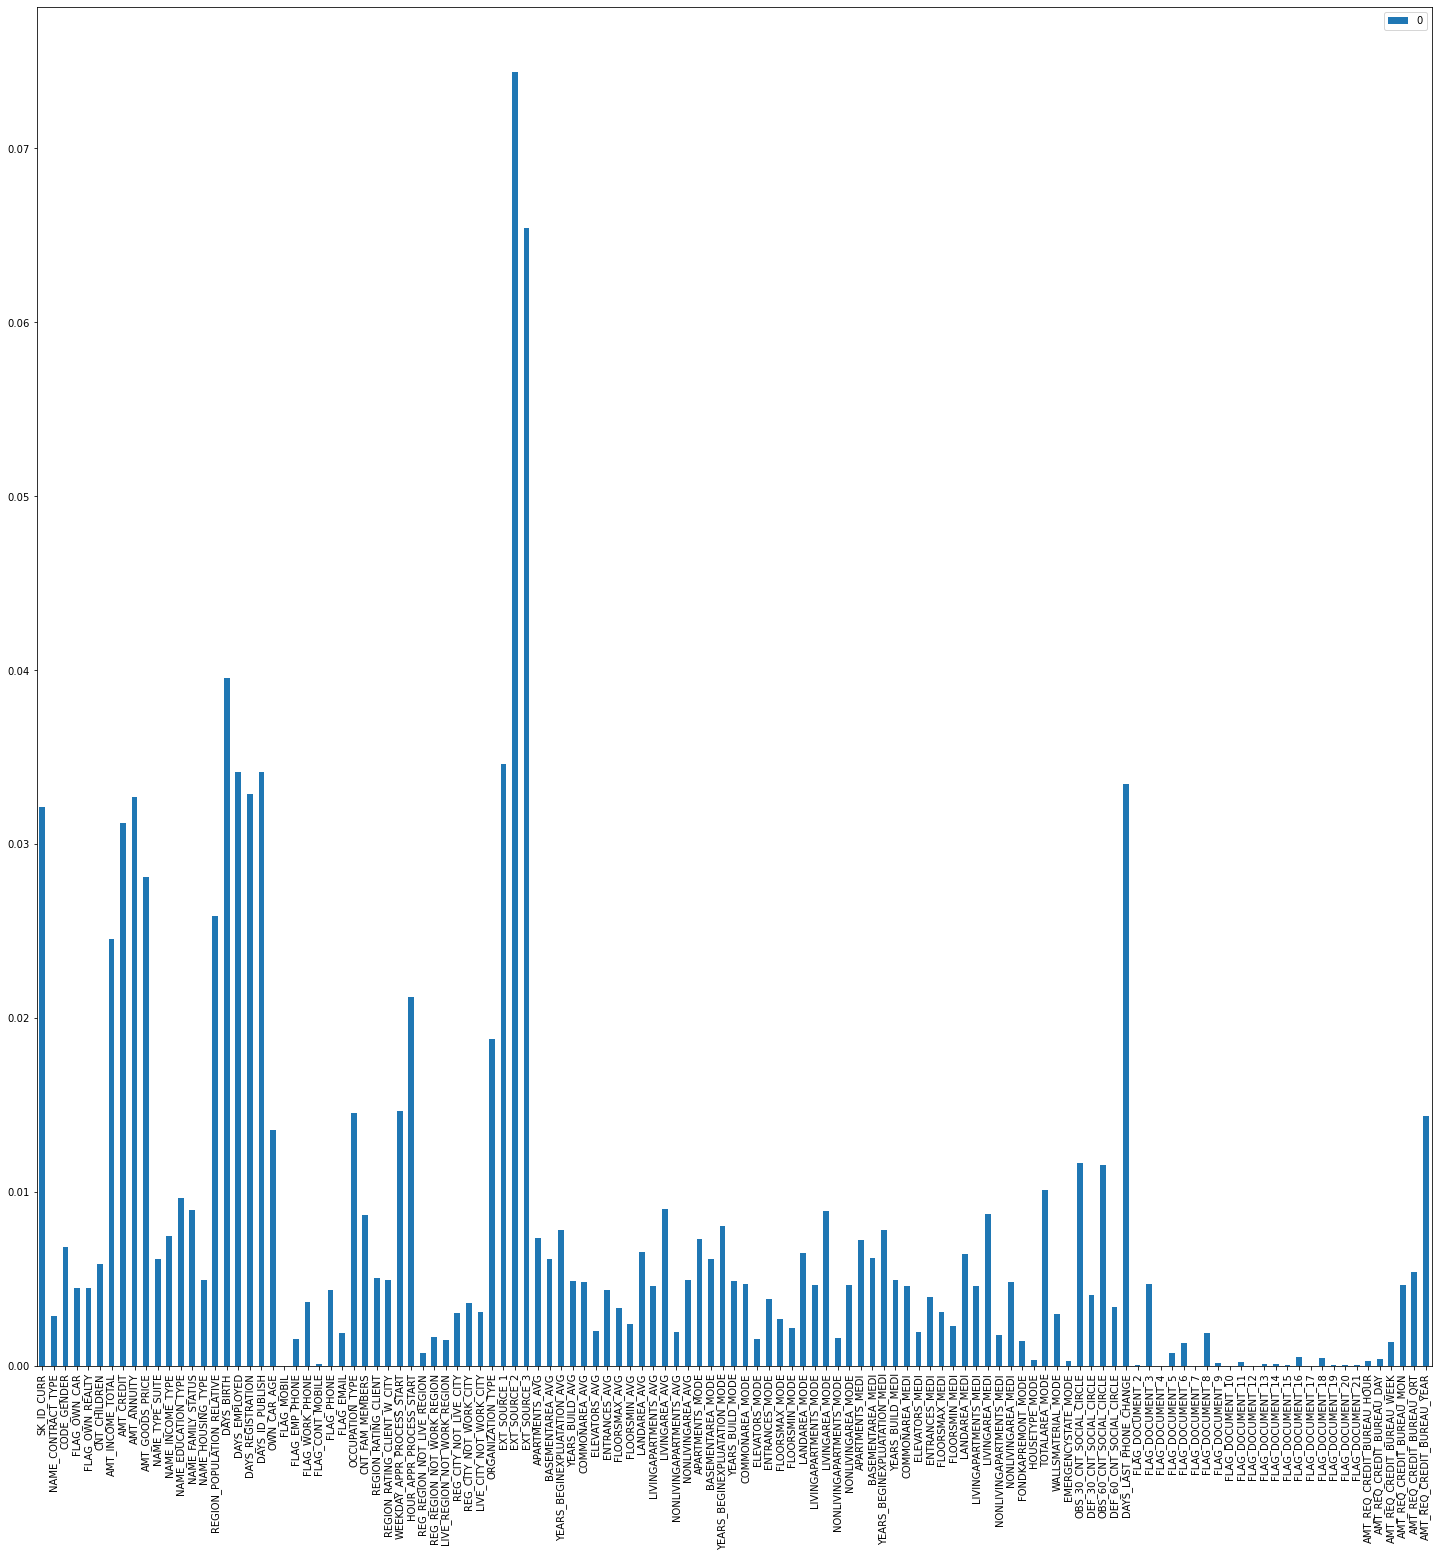

In [120]:
pd.DataFrame(model1.feature_importances_,index=x_train_re.columns).plot.bar(figsize=(25,25))

### construction du  modèle 1 (Regression logistique)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model2=LogisticRegression(random_state=seed, max_iter=3000)
hyper_parametre_lg={"C":[0.001,0.01,0.1,1,10,100,200]}
gride_lg=GridSearchCV(model2,hyper_parametre,cv=5)

### evaluation du modèle  1

In [ ]:
gride_lg.fit(x_train_re,y_train_re)

### determination des meilleurs hyperparamètre

In [ ]:
model_lg=gride_lg.best_estimator_

In [ ]:
gride_lg.best_score_

## test du modèle 1

In [ ]:
testemodel(model_lg)

### construction du modèle 2

In [159]:
model3=RandomForestClassifier(random_state=seed)
hyp_para_rd={"n_estimators":[5,10,20,100,200],"max_depth":[None,2,5,10,15,20]}
gride_rd=GridSearchCV(model3,hyp_para,cv=5)


### evaluation du modèle 3

In [ ]:
gride_rd.fit(x_train_re,y_train_re)



In [ ]:
model_rd=gride_rd.best_estimator_

## test du modèle 2

In [ ]:
testemodel(model_rd)

### construction du modèle 3

In [ ]:
from sklearn.svm import SVC
model4=SVC(random_state=seed)
hyper_para_svc={"C":[0.001,0.01,0.1,1,10,100,200],'kernel':{"linear","rbf"}}
gride_svc=GridSearchCV(model4,hyper_para_svc,cv=5)


### evaluation du modèle 4

In [ ]:
gride_svc.fit(x_train_re,y_train_re)


In [ ]:
model_svc=gride_svc.best_estimator_

## test du modèle 3 

In [ ]:
testemodel(model_svc)

## construction du modèle 4

In [ ]:
from sklearn.ensemble import BaggingClassifier
model5=BaggingClassifier(random_state=seed)
hyper_para_bg={"C":[0.001,0.01,0.1,1,10,100,200]}
gride_gb=GridSearchCV(model5,hyper_para_bg,cv=5)



### evaluatio du moèle 4

In [ ]:
gride_gb.fit(x_train_re,y_train_re)


In [ ]:
model_gb=gride_gb.best_estimator_

### test du modèle 4

In [ ]:
testemodel(model_gb)

### construction du modèle 5

In [ ]:
model6=KNeighborsClassifier()
hyper_para_kn={"n_neighbors":np.arange(1,50),"metric":["euclidean","manhattan"]}
gride_kn=GridSearchCV(model6,hyper_para_kn,cv=5)  


### evaluation du modèle 5 

In [ ]:
gride_kn.fit(x_train_re,y_train_re)


In [ ]:
model_kn=gride_kn.best_estimator_

### test du modèle 5

In [ ]:

testemodel(model_kn)

#### evalaution de la performance des modèles

In [ ]:
def evalu_modele(model,feature,target):
    pred=model.predict(feature)
    score=accuracy_score(y_val,pred)
    print("le score globale du modèle est ",round(score,3))
    
    

In [ ]:
models=[model_lg,model_rd,model_svc,model_gb,model_kn]
for model in models:
    print("modèle"+str(model))
    evalu_modele(model,x_val,y_val)
    print("-"*70)
    